# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 3 - focus on the demographics of the research population; d. focus on Region

In [20]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

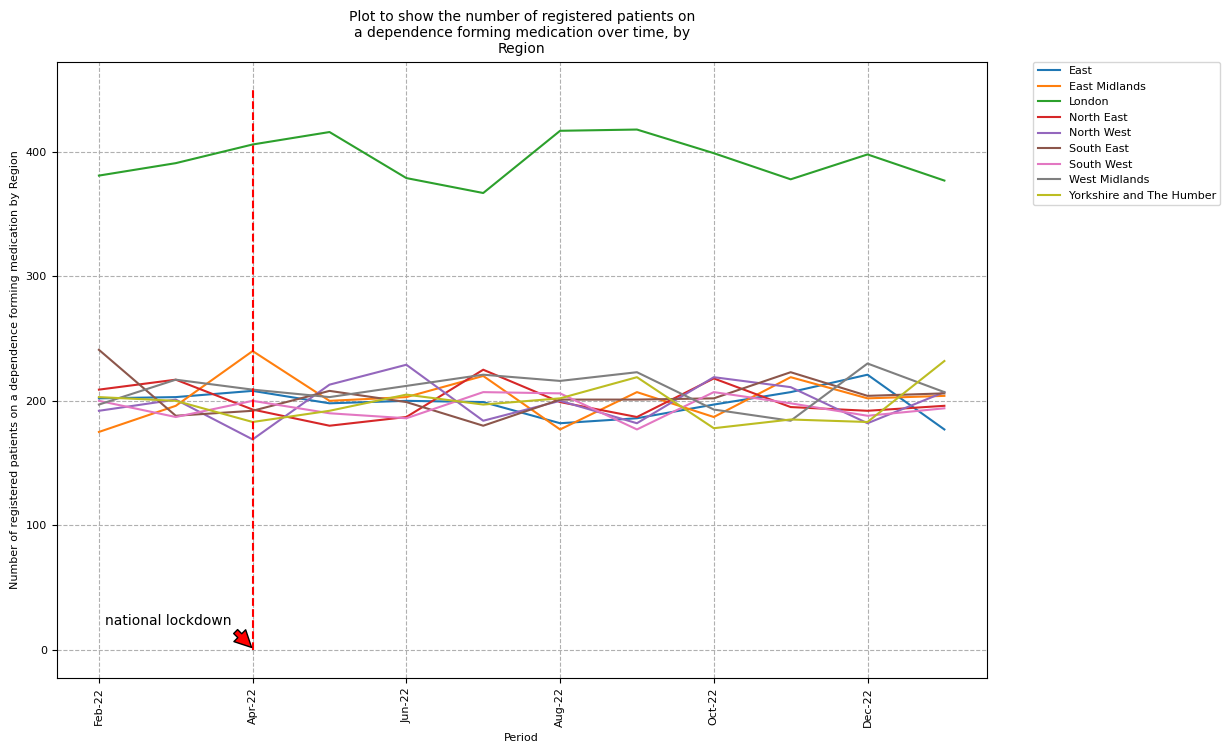

In [21]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=450,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [22]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     202              175       381           209           192           241           200              197                         203
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     177              204       377           196           207           206           194              207                         232


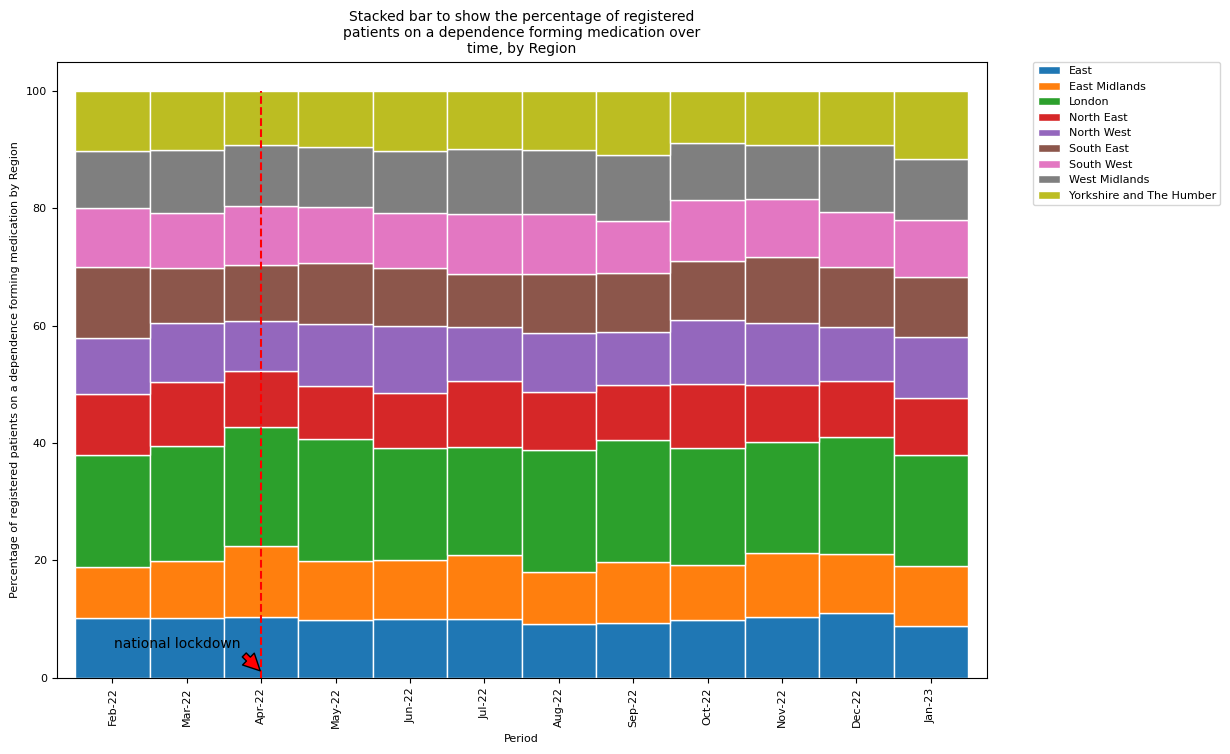

In [23]:
df_region_stacked = pd.DataFrame(df_measure_dfm_medications_region_rate)
df_region_stacked.head()
totrm = df_region_stacked.sum(axis=1)
perrm = df_region_stacked.div(totrm, axis=0).mul(100).round(2)
ax = perrm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [24]:
print(tabulate(perrm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    10.1             8.75     19.05         10.45           9.6         12.05            10             9.85                       10.15
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    8.85             10.2     18.85           9.8         10.35          10.3           9.7            10.35                        11.6


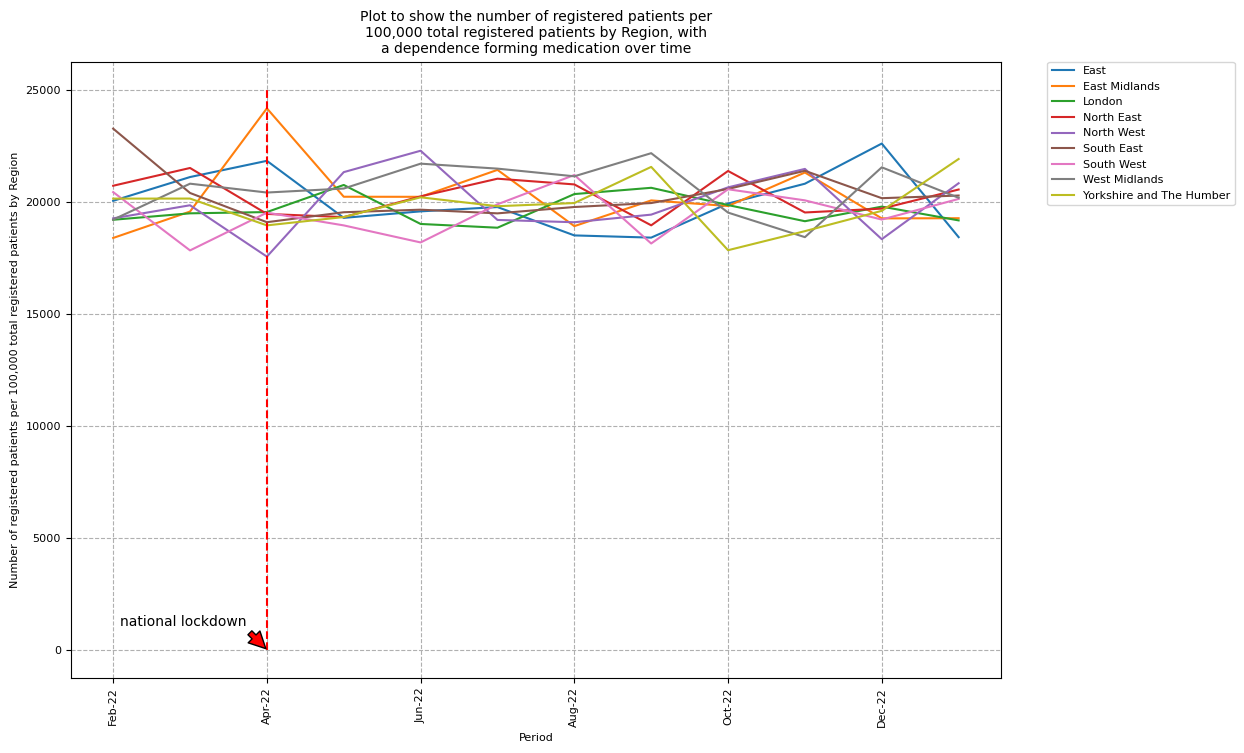

In [25]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [26]:
print(tabulate(df_region_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_region_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  20039.7          18382.4     19194       20713.6       19257.8       23262.5         20429          19200.8                     20138.9
date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23  18418.3          19263.5   19166.2       20545.1       20824.9       20275.6       20124.5          20175.4                     21907.5


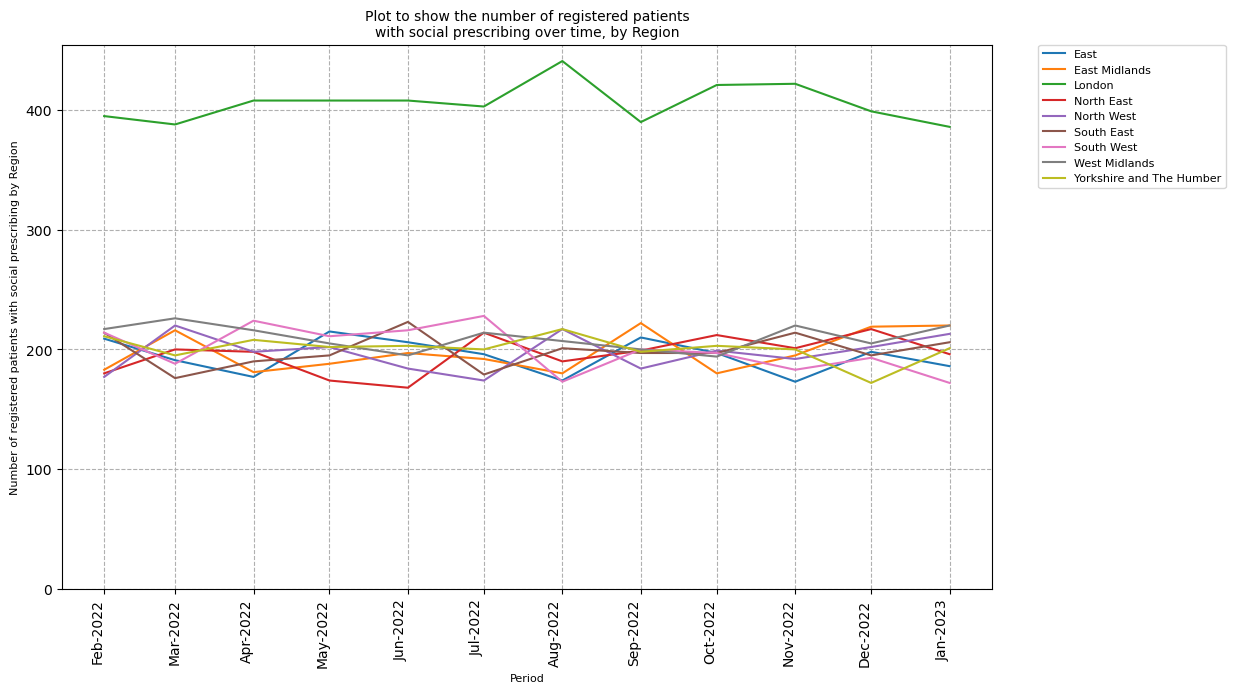

In [27]:
data_measure_social_prescribing_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_region_rate)
df2 = df.groupby(['date', 'region']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by Region', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [28]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     209              183       395           180           177           214           214              217                         211
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     186              220       386           196           213           206           172              220                         201


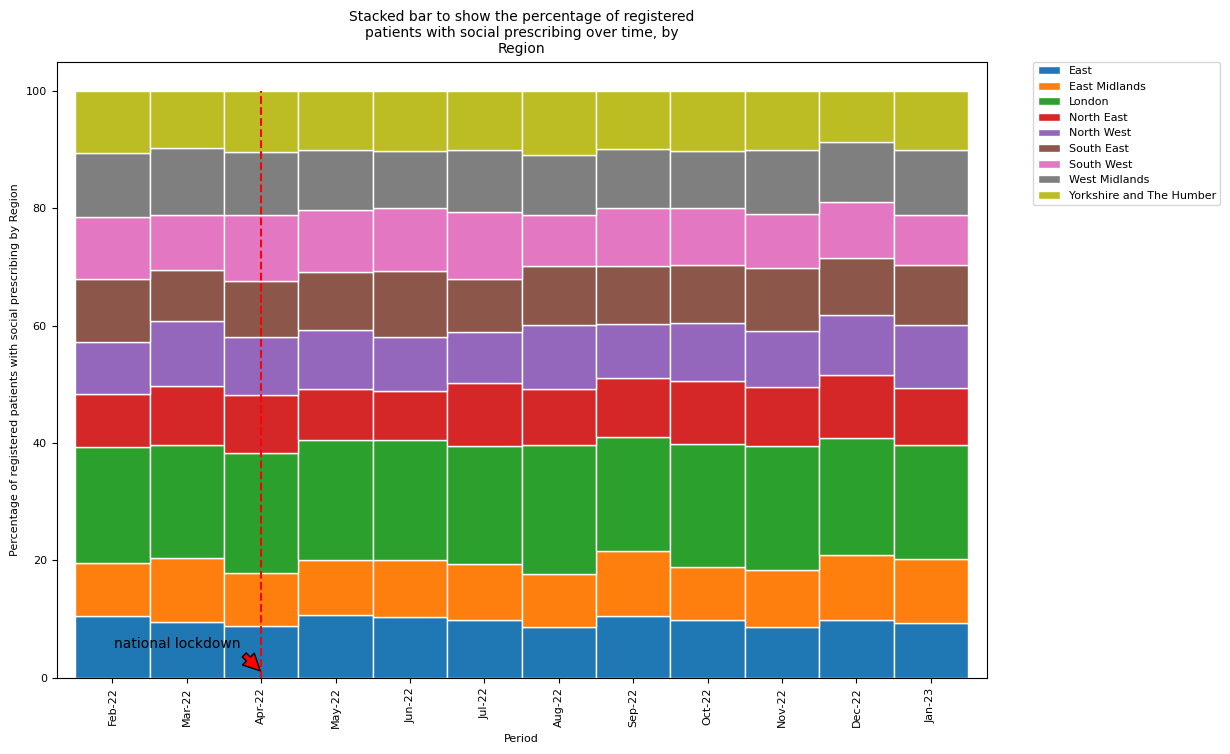

In [29]:
df_region_social_stacked = pd.DataFrame(df2)
df_region_social_stacked.head()
df_region_social_stacked.index = pd.to_datetime(df_region_social_stacked.index).strftime('%b-%y')
totrs = df_region_social_stacked.sum(axis=1)
perrs = df_region_social_stacked.div(totrs, axis=0).mul(100).round(2)
ax = perrs.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [30]:
print(tabulate(perrs.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrs.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   10.45             9.15     19.75             9          8.85          10.7          10.7            10.85                       10.55
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     9.3               11      19.3           9.8         10.65          10.3           8.6               11                       10.05


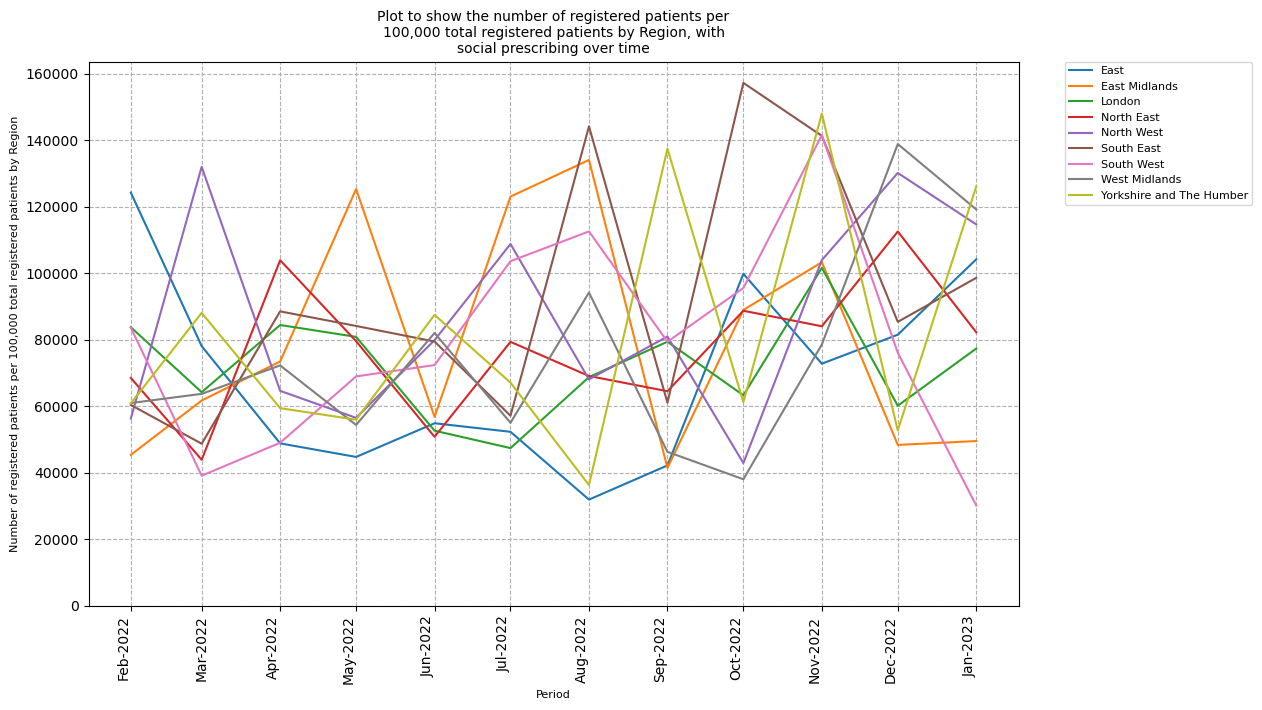

In [31]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'region']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [32]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  124216          45355.4   83742.6       68504.7         56256       60382.7       83605.6          60931.9                     60838.6
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  104154            49512   77329.2       82224.2        114647       98583.1         30105           119152                      126059


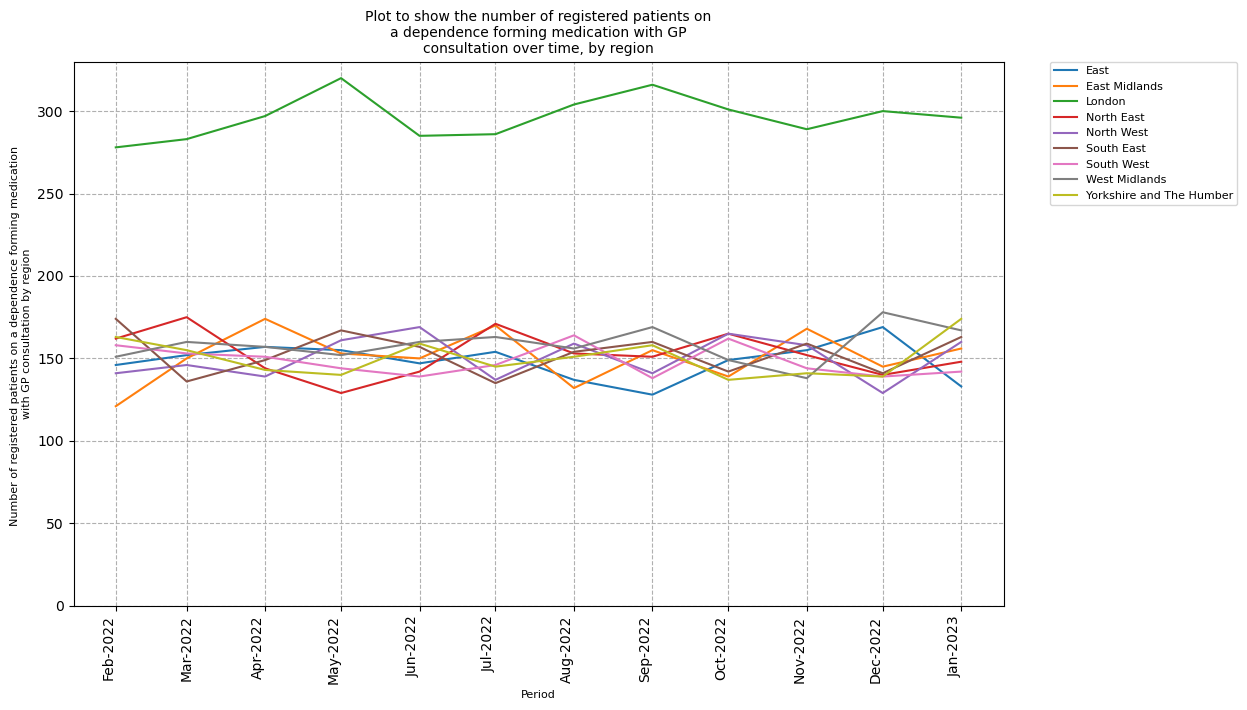

In [33]:
data_measure_consultation_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["with_consultation"] == 1, :]
df = pd.DataFrame(data=data_measure_consultation_region_rate)
df2 = df.groupby(['date', 'region']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [34]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     146              121       278           162           141           174           158              151                         163
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     133              156       296           148           160           163           142              167                         174


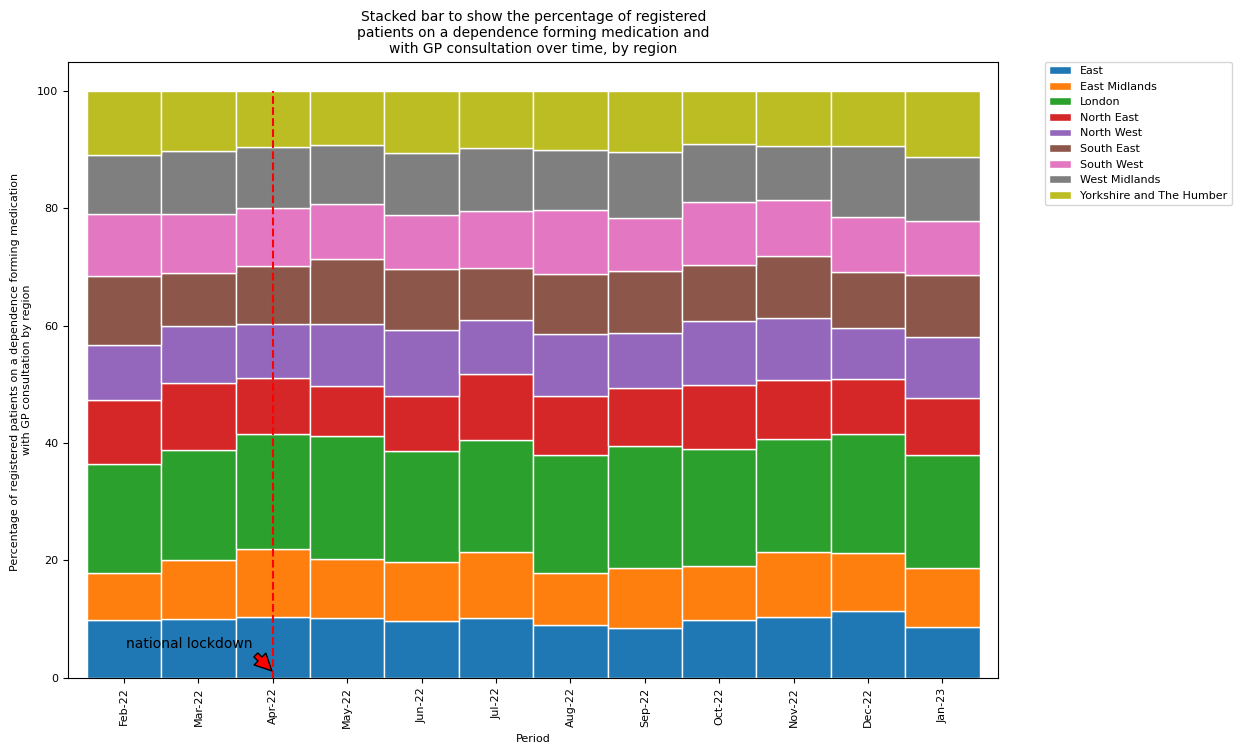

In [35]:
df_region_consult_stacked = pd.DataFrame(df2)
df_region_consult_stacked.head()
df_region_consult_stacked.index = pd.to_datetime(df_region_consult_stacked.index).strftime('%b-%y')
totrc = df_region_consult_stacked.sum(axis=1)
perrc = df_region_consult_stacked.div(totrc, axis=0).mul(100).round(2)
ax = perrc.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [36]:
print(tabulate(perrc.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrc.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    9.77              8.1     18.61         10.84          9.44         11.65         10.58            10.11                       10.91
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    8.64            10.14     19.23          9.62          10.4         10.59          9.23            10.85                       11.31


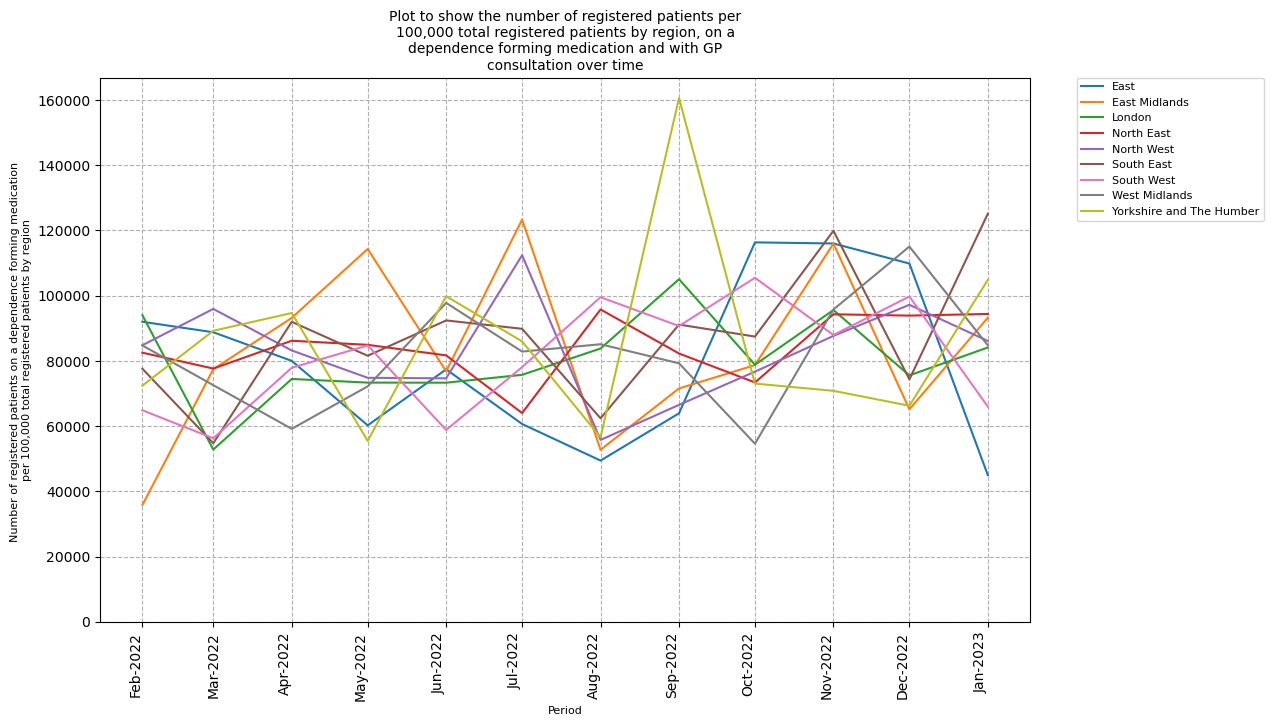

In [37]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'region']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by region', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by region, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [38]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  91984.9          35805.6   94003.8       82514.8       84803.5         77591         64853          84726.5                       72400
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  44942.8          93232.7   84105.7       94393.1       86109.7        125136       65944.2          84758.6                      104857
